In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from LinearRegression import LinearRegression

### Dataset Exploration & Cleaning

In [2]:
data_path = Path.cwd()
df = pd.read_csv(data_path / 'Company_data.csv')
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


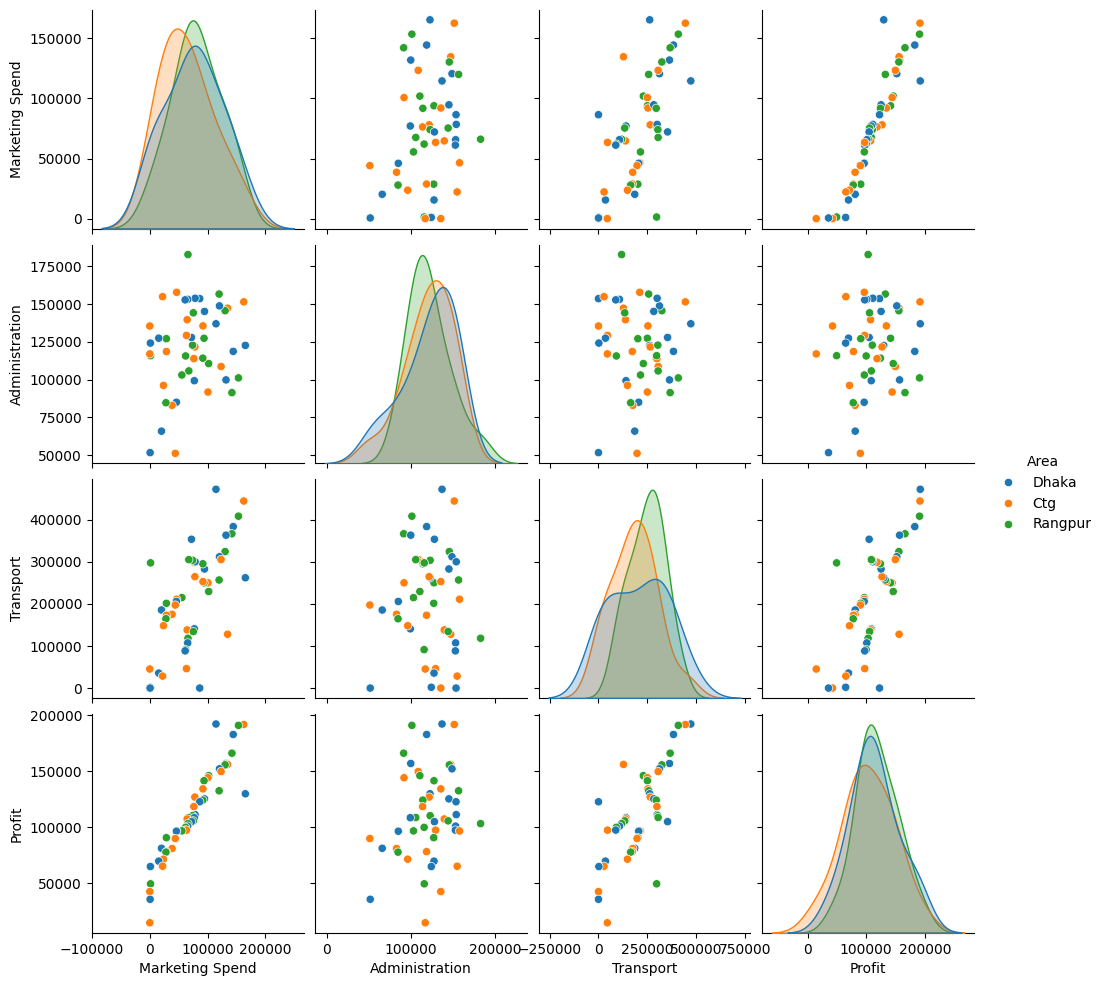

In [3]:
sns.pairplot(df, hue='Area')

<Axes: >

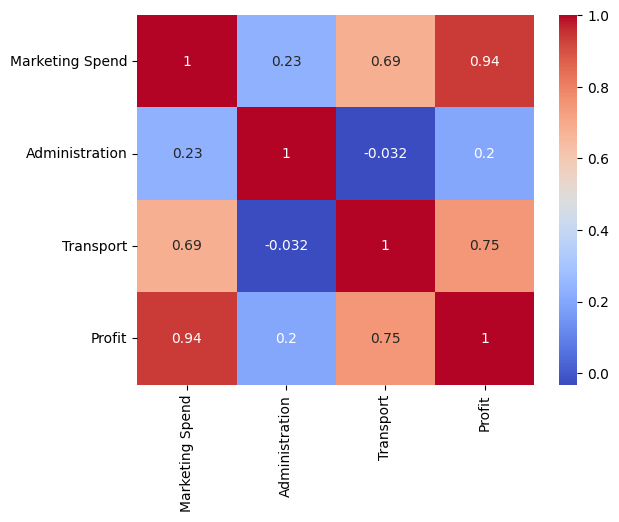

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

<Axes: >

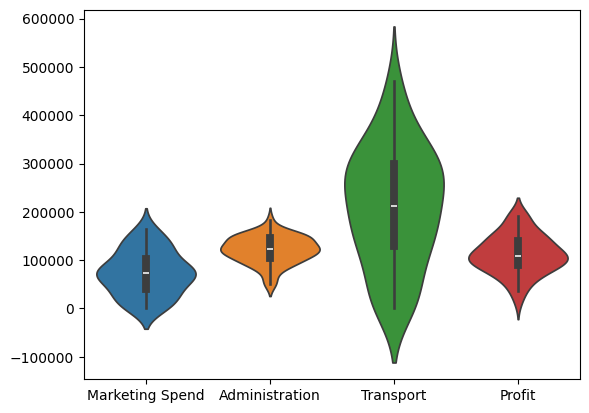

In [5]:
sns.violinplot(df)

### Dataset cleaning

In [6]:
# Remove Building Type
if 'Area' in df.columns:
    df = df.drop(['Area'], axis=1)
df.head(10)

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
# Choose features to predict
feature_names = df.columns[:-1]
X, y = df[feature_names].to_numpy(), df[['Profit']].to_numpy()
print(feature_names)

Index(['Marketing Spend', 'Administration', 'Transport'], dtype='object')


### Linear Regression

Itération 000000: MSE=2.9109E+09
Itération 001000: MSE=1.2783E+08
Itération 002000: MSE=1.1669E+08

Fit process ended with success after 2670 iterations
MSE = 115181051.50210987

Classic LinearRegression: R²=0.8553

Model coefficients:
[[0.15487059]
 [0.60308053]
 [0.33944159]
 [0.11734606]]


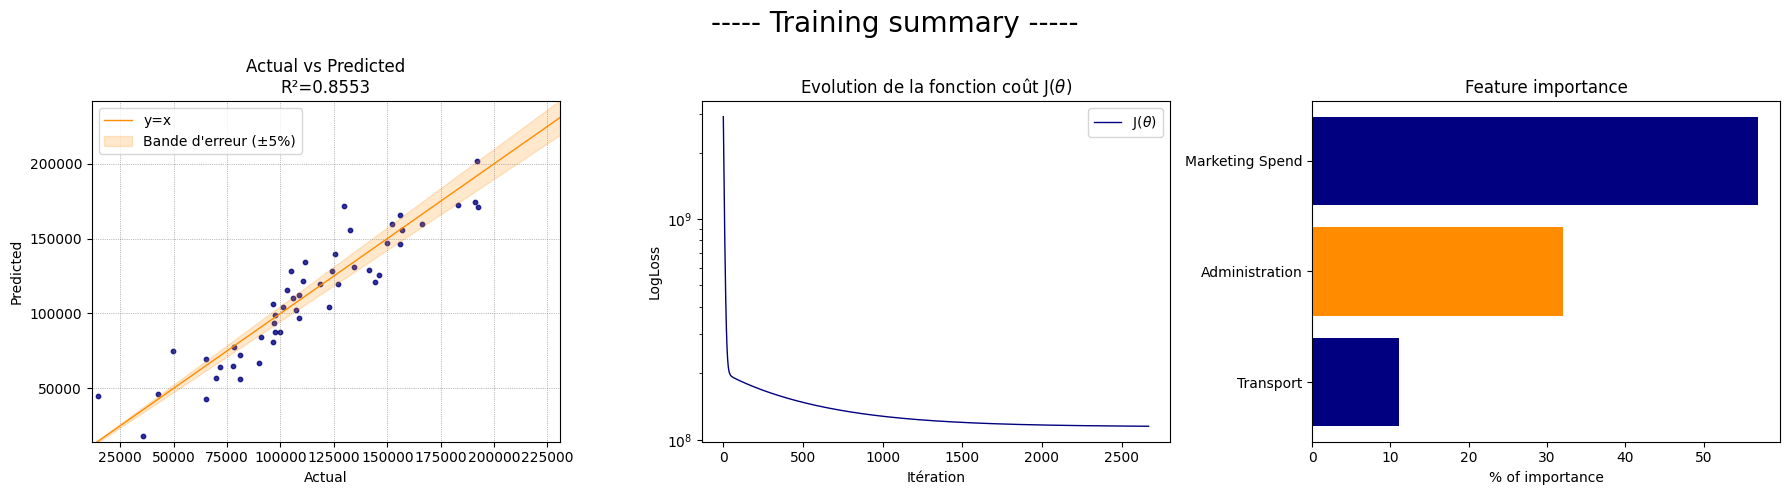

In [8]:
model = LinearRegression(lr=1e-12, eps=1e-5)
model.fit(X, y)
y_pred = model.predict(X)
print(f'Classic LinearRegression: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

### Linear Regression + STANDARDISATION

Itération 000000: MSE=7.0694E+09

Fit process ended with success after 1 iterations
MSE = 7069409417.946647

LinearRegression + Standardisation: R²=-7.8806

Model coefficients:
[[4.26328489e-04]
 [8.41901682e-01]
 [7.93508419e-01]
 [5.54602606e-01]]


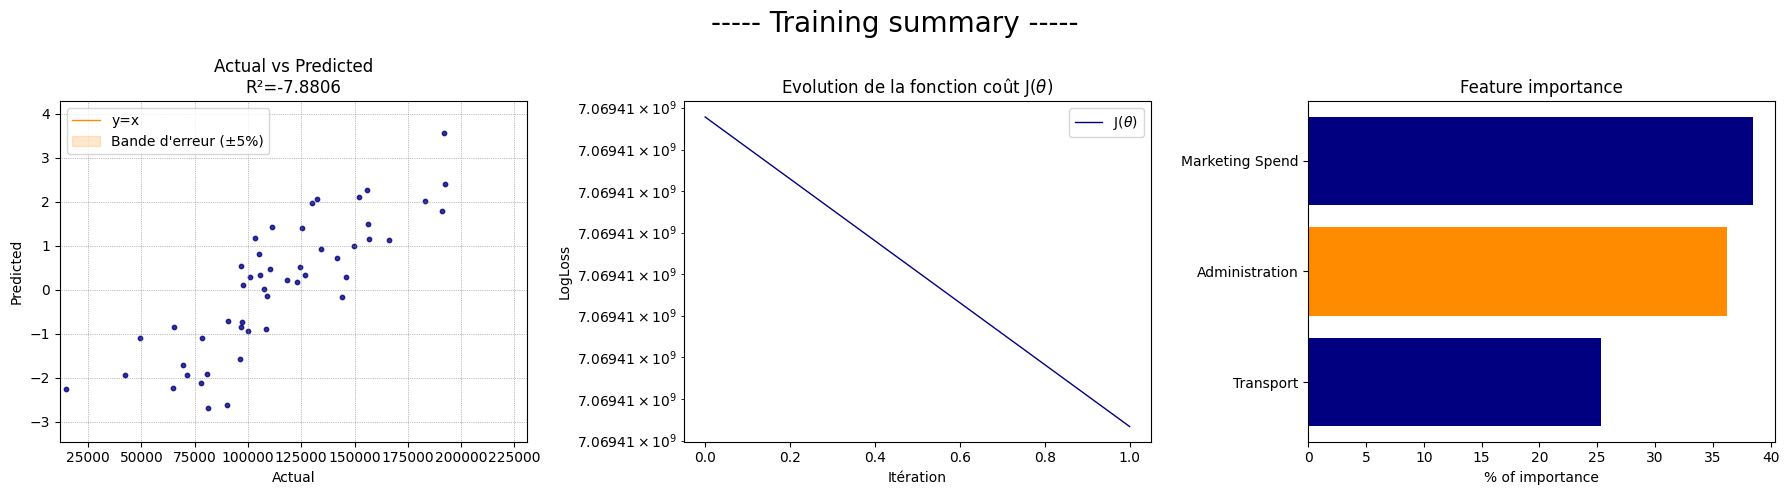

In [9]:
model = LinearRegression(lr=1e-12, eps=1e-10)
model.fit(X, y, standardize=True)
y_pred = model.predict(X)
print(f'LinearRegression + Standardisation: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

### Linear Regression + REGULARIZATION

Itération 000000: MSE=3.3835E+08
Itération 001000: MSE=1.1579E+08

Fit process ended with success after 1368 iterations
MSE = 115178383.26024444

LinearRegression + Regularisation: R²=0.8553

Model coefficients:
[[0.77108544]
 [0.60309117]
 [0.33898751]
 [0.11754976]]


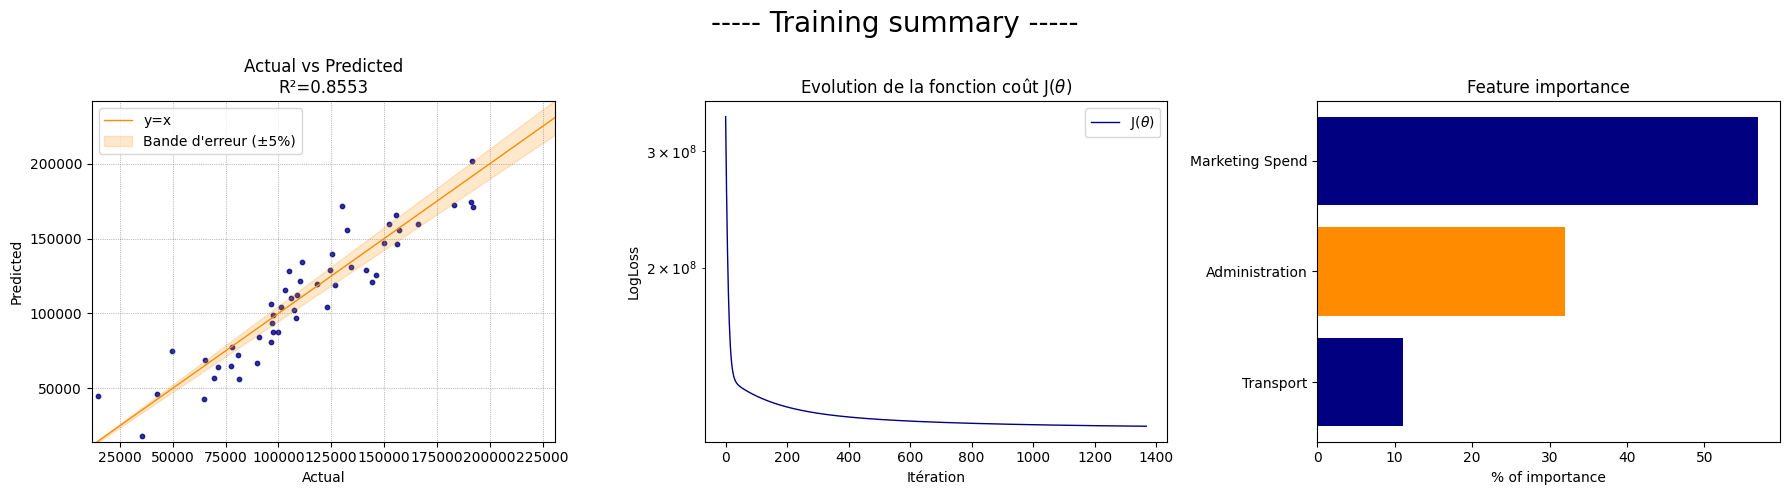

In [10]:
model = LinearRegression(lr=1e-12, eps=1e-5)
model.fit(X, y, regularization='RIDGE', penalty=5)
y_pred = model.predict(X)
print(f'LinearRegression + Regularisation: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

# SCIKIT-LEARN Score

In [11]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=1e-12, random_state=42)
sgd.fit(X, y)
sgd.score(X, y)
# sgd.coef_

C:\Appli\industrie4.0\conda\envs\ms\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8411044125365935